# Load Data and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

df_listings_bos = pd.read_csv('./boston/listings.csv')
df_calendar_bos = pd.read_csv('./boston/calendar.csv')
df_review_bos = pd.read_csv('./boston/reviews.csv')

# df_listings_sea = pd.read_csv('./seattle/listings.csv')
# df_calendar_sea = pd.read_csv('./seattle/calendar.csv')
# df_review_sea = pd.read_csv('./seattle/reviews.csv')

In [35]:
df_calendar_bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [33]:
df_listings_bos.price

0       $250.00
1        $65.00
2        $65.00
3        $75.00
4        $79.00
         ...   
3580     $69.00
3581    $150.00
3582    $198.00
3583     $65.00
3584     $65.00
Name: price, Length: 3585, dtype: object

In [ ]:
def reformat_data(df):
    # Convert price string into float
    df.price = df.price.str.replace("[$, ]", "").astype("float")
    # 
    
    return df

In [3]:
df_calendar_bos["date"] = pd.to_datetime(df_calendar_bos["date"])

In [4]:
df_calendar_bos = df_calendar_bos.set_index("date")
df_calendar_bos["year"] = df_calendar_bos.index.year
df_calendar_bos["month"] = df_calendar_bos.index.month
df_calendar_bos["day"] = df_calendar_bos.index.day

In [3]:
df_calendar_bos.price = df_calendar_bos.price.str.replace("[$, ]", "").astype("float")

In [4]:
df_calendar_bos.price

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1308885   NaN
1308886   NaN
1308887   NaN
1308888   NaN
1308889   NaN
Name: price, Length: 1308890, dtype: float64

In [6]:
#df_calendar_bos.available = df_calendar_bos.applymap(lambda x: 1 if x == 't' else 0)

In [6]:
#df_calendar_bos.fillna(0, inplace=True)
df_calendar_bos.dropna()

,listing_id,available,price,year,month,day
date,,,,,,
2017-08-22,3075044,t,65.0,2017,8,22
2017-08-21,3075044,t,65.0,2017,8,21
2017-08-20,3075044,t,65.0,2017,8,20
2017-08-19,3075044,t,75.0,2017,8,19
2017-08-18,3075044,t,75.0,2017,8,18
...,...,...,...,...,...,...
2016-09-20,14504422,t,62.0,2016,9,20
2016-09-19,14504422,t,62.0,2016,9,19
2016-09-18,14504422,t,62.0,2016,9,18


In [12]:
# df_calendar_bos.available = df_calendar_bos.applymap(lambda x: 1 if x == 't' else 0)

In [12]:
average = df_calendar_bos.groupby(['year','month'])['price'].mean()

In [13]:
df_calendar_bos['period'] = df_calendar_bos['year'].map(str)+ '-' +df_calendar_bos['month'].map(str)

In [14]:
df_calendar_bos['period'] = pd.to_datetime(df_calendar_bos['period'], format='%Y-%m').dt.strftime('%Y-%m')
df_calendar_bos.reset_index()
df_calendar_bos = df_calendar_bos.set_index('period')

In [24]:
average = df_calendar_bos.groupby(['period']).count()

In [25]:
average

,listing_id,available,price,year,month,day
period,,,,,,
2016-09,89650,89650,24401,89650,89650,89650
2016-10,111166,111166,46345,111166,111166,111166
2016-11,107580,107580,58888,107580,107580,107580
2016-12,111166,111166,60997,111166,111166,111166
2017-01,111166,111166,63181,111166,111166,111166
2017-02,100408,100408,56810,100408,100408,100408
2017-03,111166,111166,55181,111166,111166,111166
2017-04,107580,107580,51382,107580,107580,107580
2017-05,111166,111166,53600,111166,111166,111166


In [15]:
average = df_calendar_bos.groupby(['period'])['price'].mean()

In [16]:
average

period
2016-09    252.677308
2016-10    233.416248
2016-11    202.924416
2016-12    192.601915
2017-01    182.799671
2017-02    180.961028
2017-03    181.818742
2017-04    197.252890
2017-05    193.712295
2017-06    196.535302
2017-07    202.486309
2017-08    203.330142
2017-09    194.658331
Name: price, dtype: float64

<AxesSubplot:xlabel='period', ylabel='price'>

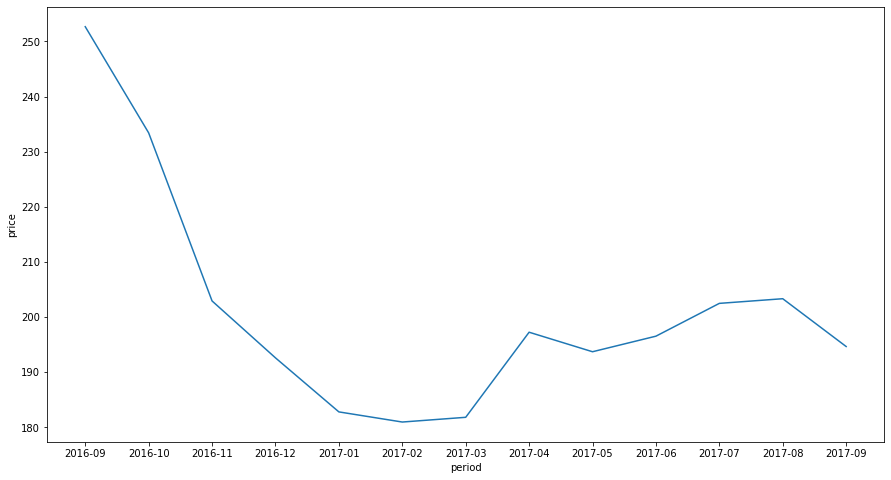

In [17]:
plt.figure(figsize=(15,8))

sns.lineplot(data = average)

In [18]:
available_room = df_calendar_bos.groupby(['period']).count().listing_id
#available_room = df_calendar_bos.set_index("date")

In [19]:
available_room

period
2016-09     89650
2016-10    111166
2016-11    107580
2016-12    111166
2017-01    111166
2017-02    100408
2017-03    111166
2017-04    107580
2017-05    111166
2017-06    107580
2017-07    111166
2017-08    111166
2017-09     17930
Name: listing_id, dtype: int64

<AxesSubplot:xlabel='period', ylabel='listing_id'>

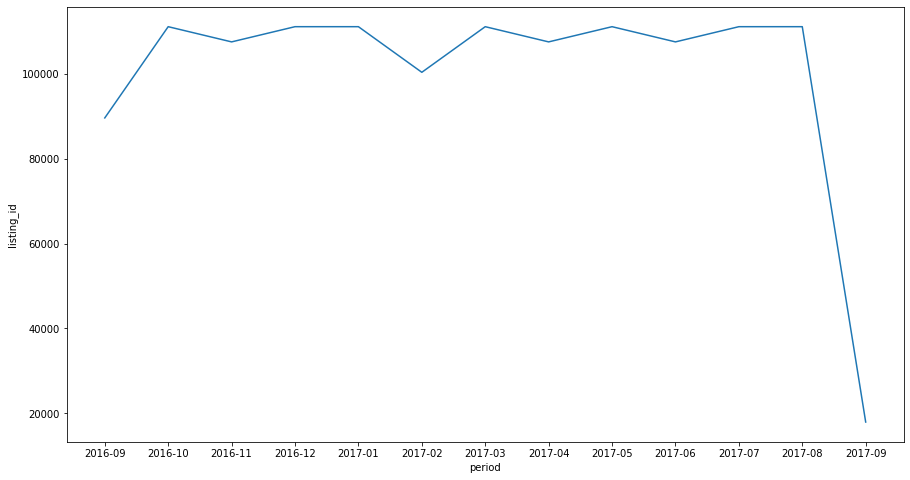

In [21]:
plt.figure(figsize=(15,8))
sns.lineplot(data = available_room)